# Comparison of the results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Baseline performance

In [6]:
nn_reviews_baseline = pd.read_csv('results/baselines/nn_reviews_baseline.csv')
nn_news_baseline = pd.read_csv('results/baselines/nn_news_baseline.csv')
svm_reviews_baseline = pd.read_csv('results/baselines/svm_reviews_baseline.csv')
svm_news_baseline = pd.read_csv('results/baselines/svm_news_baseline.csv')
nn_reviews_augmented_baseline = pd.read_csv('results/baselines/nn_reviews_augmented_baseline.csv')
svm_reviews_augmented_baseline = pd.read_csv('results/baselines/svm_reviews_augmented_baseline.csv')

In [7]:
plt.style.use('seaborn-v0_8-pastel')


In [8]:
nn_reviews_baseline.rename(columns={"Unnamed: 0": "Metric"}, inplace=True)
svm_reviews_baseline.rename(columns={"Unnamed: 0": "Metric"}, inplace=True)
nn_news_baseline.rename(columns={"Unnamed: 0": "Metric", "1": "World", "2": "Sports", "3": "Business", "4": "Sci/Tech"}, inplace=True)
svm_news_baseline.rename(columns={"Unnamed: 0": "Metric", "1": "World", "2": "Sports", "3": "Business", "4": "Sci/Tech"}, inplace=True)

nn_reviews_augmented_baseline.rename(columns={"Unnamed: 0": "Metric"}, inplace=True)
svm_reviews_augmented_baseline.rename(columns={"Unnamed: 0": "Metric"}, inplace=True)

In [9]:
nn_reviews_baseline.set_index('Metric',inplace=True)
svm_reviews_baseline.set_index('Metric',inplace=True)
nn_news_baseline.set_index('Metric',inplace=True)
svm_news_baseline.set_index('Metric',inplace=True)

nn_reviews_augmented_baseline.set_index('Metric',inplace=True)
svm_reviews_augmented_baseline.set_index('Metric',inplace=True)

### Creating Runtime Dataframe

In [10]:
runtimes = pd.DataFrame.from_dict( {
    "train" : [nn_reviews_baseline.train_time[0] ,
               svm_reviews_baseline.train_time[0],
               nn_reviews_augmented_baseline.train_time[0] ,
               svm_reviews_augmented_baseline.train_time[0],
               nn_news_baseline.train_time[0],
               svm_news_baseline.train_time[0]],
    "test" : [nn_reviews_baseline.test_time[0],
              svm_reviews_baseline.test_time[0],
              nn_reviews_augmented_baseline.test_time[0] ,
              svm_reviews_augmented_baseline.test_time[0],
              nn_news_baseline.test_time[0],
              svm_news_baseline.test_time[0]],
    "feature_extraction" : [nn_reviews_baseline.feature_extraction_time[0],
                            nn_reviews_baseline.feature_extraction_time[0],
                            nn_reviews_augmented_baseline.feature_extraction_time[0] ,
                            nn_reviews_augmented_baseline.feature_extraction_time[0],
                            nn_news_baseline.feature_extraction_time[0],
                            nn_news_baseline.feature_extraction_time[0]]
}
)
runtimes.index = ["nn_reviews",
                  "svm_reviews", "nn_reviews_augmented", "svm_reviews_augmented","nn_news", "svm_news"]

In [79]:
runtimes

,train,test,feature_extraction
nn_reviews,1262.204322,0.028742,3.092748
svm_reviews,78.659720,4.392251,3.092748
nn_news,15825.467003,0.049952,24.561729
svm_news,7950.114312,104.807230,24.561729


Dropping time columns from original datasets

In [11]:
nn_reviews_baseline.drop(columns=['train_time', 'test_time', 'feature_extraction_time'], inplace=True)
nn_news_baseline.drop(columns=['train_time', 'test_time', 'feature_extraction_time'], inplace=True)
nn_reviews_augmented_baseline.drop(columns=['train_time', 'test_time', 'feature_extraction_time'], inplace=True)

svm_reviews_baseline.drop(columns=['train_time', 'test_time'], inplace=True)
svm_news_baseline.drop(columns=['train_time', 'test_time'], inplace=True)
svm_reviews_augmented_baseline.drop(columns=['train_time', 'test_time'], inplace=True)

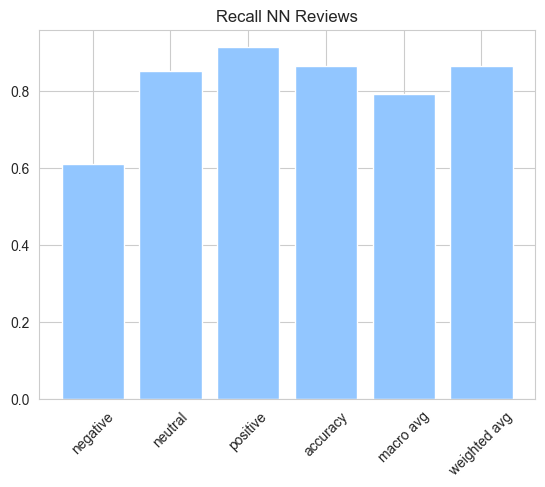

In [12]:
plt.bar( nn_reviews_baseline.columns, nn_reviews_baseline.loc['recall',:])
plt.xticks(rotation=45)
plt.title("Recall NN Reviews")
plt.show()

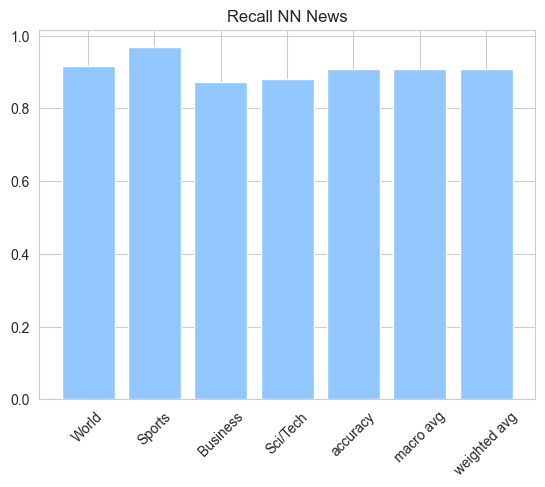

In [13]:
plt.bar( nn_news_baseline.columns, nn_news_baseline.loc['recall',:])
plt.xticks(rotation=45)
plt.title("Recall NN News")
plt.show()

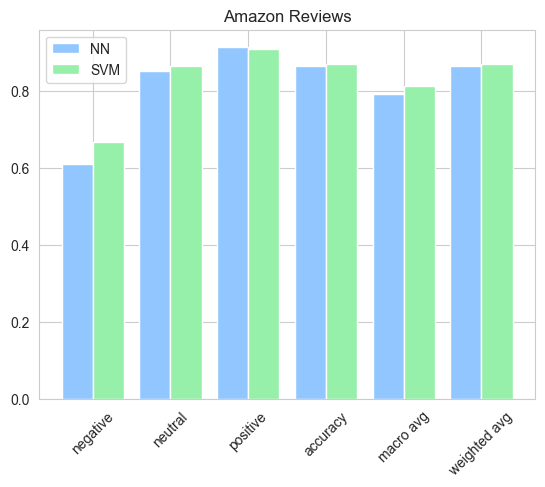

In [14]:
x = np.arange(nn_reviews_baseline.shape[1])
width = 0.40

# plot data in grouped manner of bar type
plt.bar(x-0.2, nn_reviews_baseline.loc['recall',:], width)
plt.bar(x+0.2, svm_reviews_baseline.loc['recall',:], width)
plt.xticks(x, nn_reviews_baseline.columns, rotation=45)
plt.title("Amazon Reviews")
plt.legend(['NN', 'SVM'])
plt.show()

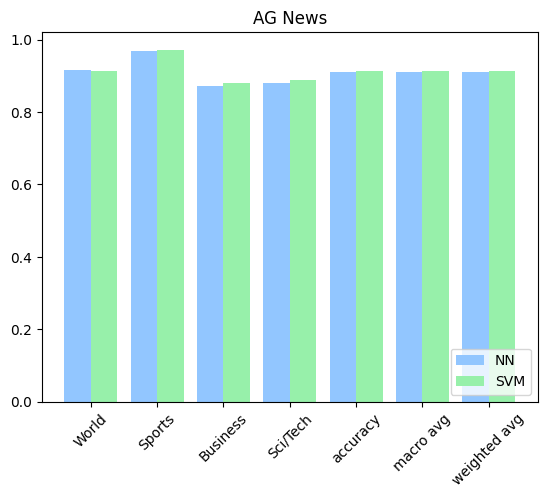

In [87]:
x = np.arange(nn_news_baseline.shape[1])
width = 0.40

# plot data in grouped manner of bar type
plt.bar(x-0.2, nn_news_baseline.loc['recall',:], width)
plt.bar(x+0.2, svm_news_baseline.loc['recall',:], width)
plt.xticks(x, nn_news_baseline.columns, rotation=45)
plt.title("AG News")
plt.legend(['NN', 'SVM'],loc='lower right')
plt.show()

TypeError: Legend.__init__() got an unexpected keyword argument 'color'

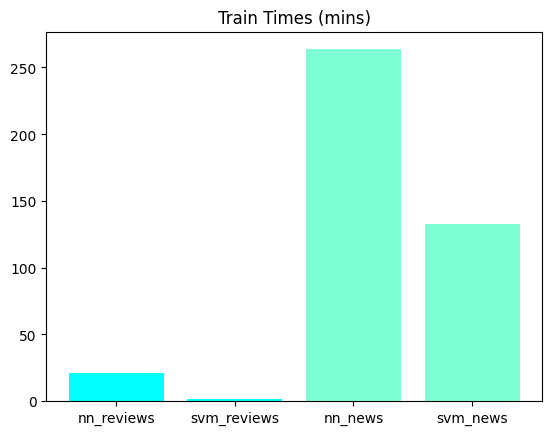

In [99]:
fst = 'aqua'
snd = 'aquamarine'
trd = 'darksalmon'
x = runtimes.index
# plot bars in stack manner
plt.bar(x, runtimes.train/60, color=[fst, fst, snd, snd])
#plt.bar(x, runtimes.test, bottom=runtimes.train, color='b')
#plt.yscale("log")
plt.title("Train Times (mins)")
plt.show()

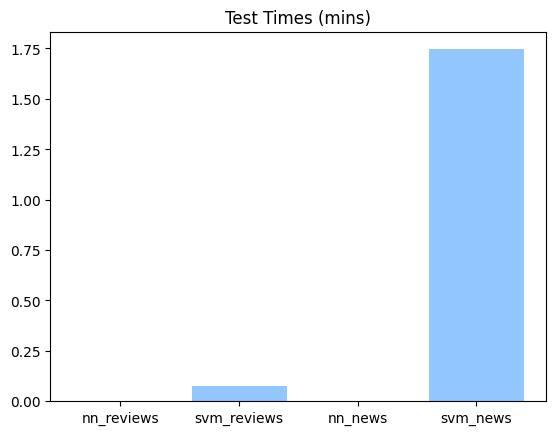

In [89]:
x = runtimes.index
plt.bar(x, runtimes.test/60)
plt.title("Test Times (mins)")
plt.show()

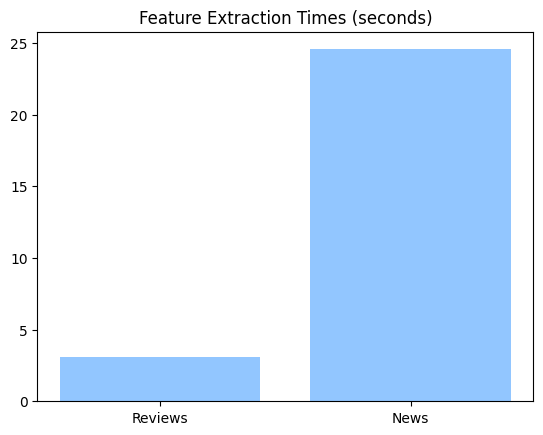

In [90]:
x = ['Reviews', 'News']
plt.bar(x, runtimes.feature_extraction[1:3])
plt.title("Feature Extraction Times (seconds)")
plt.show()

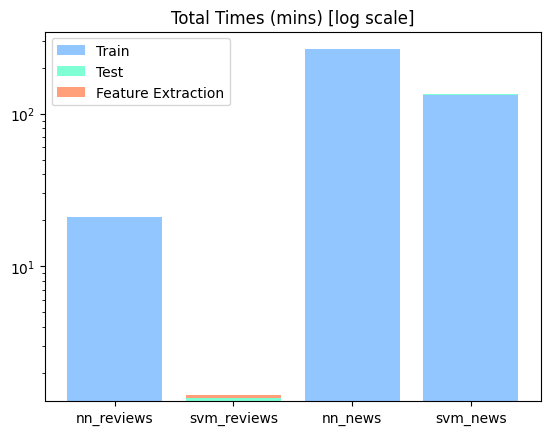

In [91]:
x = runtimes.index
# plot bars in stack manner
plt.bar(x, runtimes.train/60)
plt.bar(x, runtimes.test/60, bottom=runtimes.train/60, color='aquamarine')
plt.bar(x, runtimes.feature_extraction/60, bottom=runtimes.train/60 + runtimes.test/60, color='lightsalmon')
plt.yscale("log")
plt.title("Total Times (mins) [log scale]")
plt.legend(['Train', 'Test', 'Feature Extraction'], loc='upper left')
plt.show()